<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Decision_Tree_Classifier_for_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications
___

### Week 3: Decision Tree Classifier for Disease Prediction

### Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score



In [5]:
#simulate heathcare dataset
X, y = make_classification(
    n_samples=300,
    n_features=5,
    n_informative=4,
    n_redundant=0,
    n_classes=2,
    weights=[0.8, 0.2],  # Only 20% have the disease
    class_sep=1.2,
    random_state=1
)


In [6]:
#assign meaningful medical feature names
df = pd.DataFrame(X, columns=[
    'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 'age'
])
df['disease'] = y  # 0 = healthy, 1 = disease


In [7]:
#train-test split
X = df.drop('disease', axis=1)
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [8]:
#train the decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
#predict and evaluate
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


Test Accuracy: 0.9066666666666666


In [10]:
#feature importances
print("Feature Importances:", tree.feature_importances_)


Feature Importances: [0.02959774 0.15989187 0.43470828 0.0726599  0.3031422 ]


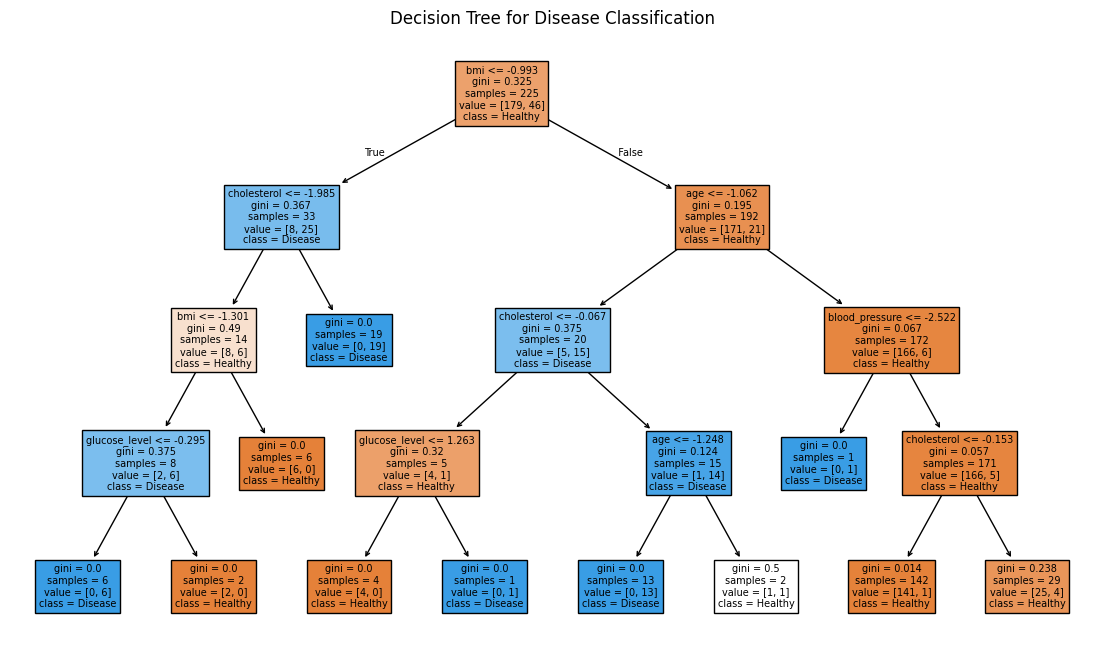

In [11]:
#visualize the decision tree
plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Healthy', 'Disease'], filled=True)
plt.title("Decision Tree for Disease Classification")
plt.show()
